<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Generación para el CLUR </font>
</div>

<div align="center"> 
<font size=5> Máscara de Teflón </font>
</div>

- **Para**: Fabricación de máscaras en CLUR con laser de femtosegundos

- **Fecha**: 2024/02/28
        
- **Objetivos**: Máscara en teflón para Mahmoud

- **Descripción** - 

- **Referencias**: -

- **Autores**: Luis Miguel Sánchez Brea

In [1]:
import matplotlib.pyplot as plt
import numpy as np

/home/luismiguel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import ezdxf
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend


mm=1.
um=mm/1000.
nm = um/1000.

inches = 25.4*mm

In [3]:
dxf_params = dict(

version="R2000",
total_size=4*inches,
num_masks=(4, 4),
line_size=5*um,
)

# Definitions

In [4]:
def start_drawing(verbose: bool = False, **dxf_params: dict):
    """Generates the drawing and the modelspace. A dictionary is required:
        version 
        total_size 
        num_masks 
        line_size 
        
    Args:
        dxf_params: dict)
        verbose (bool, optional): _description_. Defaults to False.

    Returns:
        dwg: _description_
        msp: 
        mask_size: 
    """
    
    """_summary_

    Args:
        verbose (bool, optional): _description_. Defaults to False.

    Returns:
        _type_: _description_
    """
    
    version = dxf_params['version']
    total_size = dxf_params['total_size']
    num_masks = dxf_params['num_masks']
    line_size = dxf_params['line_size']
    
    dwg = ezdxf.new(version)
    msp = dwg.modelspace()
    total_size = total_size
    num_masks = np.array(num_masks)
    line_size = line_size
    mask_size = (total_size)/np.array(num_masks)  # -5*line_size
    
    if verbose:
        print("total size: {} mm x {} mm".format(mask_size[0], mask_size[1]))

    return dwg, msp, mask_size

In [5]:
def rectangle(msp, r0: list[float], size: list[float], origin='0'):
    """Generates a rectangle

    Args:
        msp (msp): 
        r0 (list[float]): position (x0,y0)
        size (list[float]): size of rectangle: wx, wy
        origin (str, optional): center of rectangle '0' or 'center'. Defaults to '0'.

    Returns:
        msp: 
    """
    
    x0, y0 = r0
    sx, sy = size
    
    if origin == '0':
        init_point = np.array([0,0])
    elif origin == 'center':
        init_point = np.array([-sx/2, -sy/2])
    
    # print(init_point)
    points = np.array([(0,0), (sx,0), (sx,sy), (0,sy), (0,0)])
    points = points + r0 + init_point
    msp.add_lwpolyline(points, close=True)
    
    return msp   


In [6]:
def draw(dwg, msp):
    """Draws the mask

    Args:
        dwg (dwg): _description_
        msp (msp): _description_
    """
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(dwg)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(msp, finalize=True)
    plt.show()

In [7]:
def save_png(dwg, filename:str, dpi:int = 300, has_draw: bool = False):
    """Saves png.

    Args:
        dwg (dwg): _description_
        filename (str): filename of png drawing
        dpi (int, optional): dpi. Defaults to 300.
        has_draw (bool, optional): If True draws the mask. Defaults to False.
    """

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(dwg)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(dwg.modelspace(), finalize=True)
    fig.savefig(filename, dpi=dpi)
    if has_draw is False:
        plt.close()

In [8]:
def addpoint(dx: float, dy: float, points: list):
    """_summary_

    Args:
        p0 (list[float, float]): previous point (x,y)
        dx (float): increment in x
        dy (float): increment in y
        points (list): list with points

    Returns:
        points: list with added point
    """
    p0 = points[-1]
    p1 = (p0[0]+dx, p0[1] + dy)
    points.append(p1)

    
    return points
    

## Draw circles

In [9]:
pitch = 0.5*mm

width_vert = 200 *um # (150 - 200)
width_comb = 100 *um # (50 - 100)
length_comb = 10000*um

square_vert = 1*mm
square_hor  = 0.5*mm

size_external_cut = 15*mm, 15*mm
area_engraving = 10*mm, 10*mm


num_periods=int(size_external_cut[1] / (width_vert+pitch))

total_heigth = num_periods*(pitch+width_comb) + width_comb

print(num_periods)

r0=[2.5*mm, 1*mm]


21


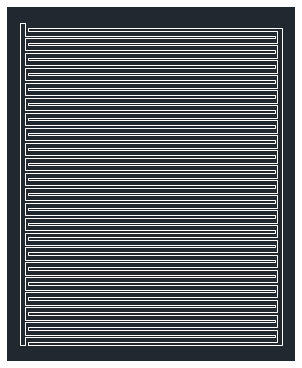

In [17]:
dwg, msp, mask_size = start_drawing(**dxf_params)


# Structure 1
def repeat_structure_1(points):
    points=addpoint(0,width_comb,points)
    points=addpoint(length_comb,0,points)
    points=addpoint(0,pitch,points)
    points=addpoint(0-length_comb,0,points)
    return points

p0 = (r0[0], r0[1])
points = [p0,]

for i in range(num_periods):
    points = repeat_structure_1(points)

points=addpoint(0,width_comb,points)
points=addpoint(length_comb+width_vert,0,points)
points=addpoint(0,-total_heigth, points)
msp.add_lwpolyline(points, close=True)


# Structure 2
def repeat_structure_2(points):
    points=addpoint(0,-pitch,points)
    points=addpoint(length_comb,0,points)
    points=addpoint(0,-width_comb,points)
    points=addpoint(0-length_comb,0,points)
    return points

p0 = (r0[0]-.1, r0[1])
points = [p0,]

points=addpoint(-width_vert,0,points)
points=addpoint(0,total_heigth+pitch/2-width_comb/2,points)
points=addpoint(width_vert,0,points)


for i in range(num_periods):
    points = repeat_structure_2(points)


msp.add_lwpolyline(points, close=True)


draw(dwg, msp)


name = '240228 clur - mahmoud 3'
dwg.saveas(name+'.dxf')
save_png(dwg, filename=name+'.png', dpi = 300)

# Cut final

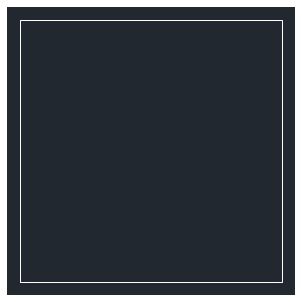

In [16]:
dwg_f, msp_f, mask_size = start_drawing(**dxf_params)


rectangle(msp_f, r0 = (0,0), size = (15*mm, 15*mm), origin='0')

draw(dwg_f, msp_f)

name = '240228 clur - mahmoud 3 - final_cut'
dwg.saveas(name+'.dxf')
save_png(dwg, filename=name+'.png', dpi = 300)

# All

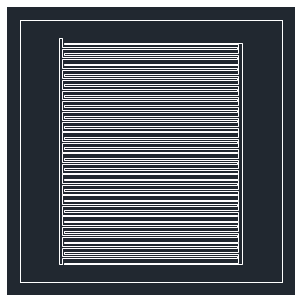

In [13]:
rectangle(msp, r0 = (0,0), size = (15*mm, 15*mm), origin='0')


draw(dwg, msp)


name = '240228 clur - mahmoud 1 - all'
save_png(dwg, filename=name+'.png', dpi = 300)